In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Used Pre trained classifiers
classif = cv2.CascadeClassifier(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\Haarcascades\haarcascade_frontalface_default.xml')

In [3]:
input_image = cv2.imread(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\images\crowdyale.jpg')

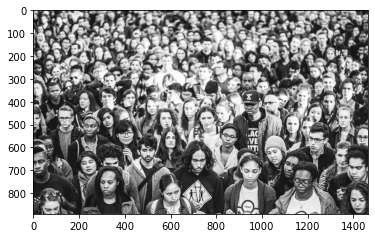

In [4]:
plt.imshow(input_image)

In [5]:
## Convert to Grayscale
gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)

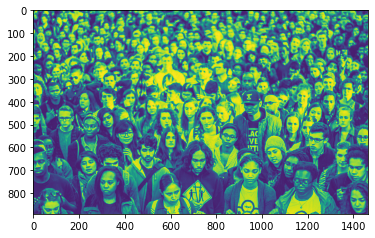

In [6]:
plt.imshow(gray)

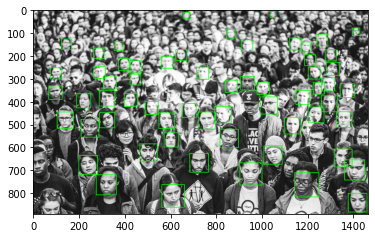

In [7]:
face = classif.detectMultiScale(gray,1.3,5)

if face is ():
    print('None')

for (x,y,w,h) in face:
    cv2.rectangle(input_image,(x,y),(x+w,y+h),(0,255,0),2)
    plt.imshow(input_image)

In [8]:
## Face + Eye detection
eye_classif = cv2.CascadeClassifier(r'C:\Users\saket\Desktop\courses\TF\OpenCV\Master OpenCV\Haarcascades\haarcascade_eye.xml')

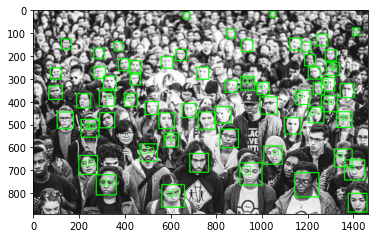

In [9]:
for (x,y,w,h) in face:
    cv2.rectangle(input_image,(x,y),(x+w,y+h),(0,255,0),3)
    plt.imshow(input_image)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = input_image[y:y+h,x:x+w]
    eye = eye_classif.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eye:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        plt.imshow(input_image)

In [14]:
## Getting a webcam input
def face_detect(input_image,size = 0.5):
    gray = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
    face = classif.detectMultiScale(gray,1.3,5)

    if face is ():
        return input_image
    
    for (x,y,w,h) in face:
        x = x-50
        y = y-50
        w = w+50
        h = h+50
        cv2.rectangle(input_image,(x,y),(x+w,y+h),(0,255,0),2)
        roi_gray = gray[y:y+h,x:x+w]
        roi_color = input_image[y:y+h,x:x+w]
        
        eye = eye_classif.detectMultiScale(roi_gray)
        for (ex,ey,ew,eh) in eye:
            cv2.rectangle(input_image,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    input_image = cv2.flip(input_image,1)
    return input_image


In [15]:

cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read()
    cv2.imshow('Face',face_detect(frame))
    if cv2.waitKey(1)==13:
        break
cap.release()
cv2.destroyAllWindows()